# Purpose
The goal of this notebook is to solve a regression problem without changing it into a classification problem. 

My previous attempt using the red_wine_quality_predictor turned into a binary classification problem. As such, I would like to practice and demonstrate my ability to solve regression problems without turning them into classification problem. 

# 6 Key steps 

We will follow and adapt the 6 key steps of Data analysis to this project.

6 Key steps: 

1) Ask 
- Define what the project would look like 
- Define what would qualify as successful result

2) Prepare 
- Build a timeline and determine how much time is needed
- Determine what data is needed to achieve a successful result

3) Process
- Collect, store, manage and protect the data.
- Processed the data by cleaning it to make sure it was complete, correct, relevant, and free of errors and outliers.

4) Analyze
- Experiment with different models and hyperparameters to meet criterias of success 
- Analyze data

5) Share / Visualize 
- Process and visualize data to share / make meaningful deductions from 

6) Act
- Determine how to implement changes and take actions based on the findings

# 1) Ask 
---

## Define what the project would look like 
* The goal of this notebook is to solve a regression problem without changing it into a classification problem 
* Therefore the goal will be utilizing the features( `longitude`,	`latitude`,	`housing_median_age`, `total_rooms`,	`total_bedrooms`, `population`, `households`, `median_income`) in the `california_housing` dataset, accuracrately predict the `median_house_value`

* A possible variation to experiment with is using `longitude`,	`latitude`,	`housing_median_age`, `total_rooms`,	`total_bedrooms`, `population`, `households`,  and `median_house_value` to determine what `median_income` would be needed to live there.



## Define what would qualify as a successful result
* We will aim for an accuracy of **>95%**

# 2) Prepare 
---
## Build a timeline and determine how much time is needed
* The estimated timeline will be a working week (5 day) sprint 

## Determine what data is needed to achieve a successful result
* We will be utilzing the sample data from google collab which has been downloaded and added to github : https://github.com/Kirlewn/Machine-Learning-Projects/tree/main/Data/california_housing_data 

* A description of the dataset can be found on kaggle at : https://www.kaggle.com/datasets/camnugent/california-housing-prices


In [2]:
# import standard expected libraries
import pandas as pd
import numpy as np 
import tensorflow as tf
import sklearn as sk 
import matplotlib.pyplot as plt
import seaborn as sns 

# 3) Process
---


##  Collect data

In [13]:
# the data is already pre-split into train and test so let's begin with importing the train data
data = pd.read_csv("https://raw.githubusercontent.com/Kirlewn/Machine-Learning-Projects/main/Data/california_housing_data/housing.csv")

data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


## Data Exploration
Determine if there are any unusuable or strange data. 
This includes outliers, missing values, mismatched data types (an column with ints having a string input), etc. 

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


From kaggle we get this description of each column: 
1. **longitude**: A measure of how far west a house is; a higher value is farther west

2. **latitude**: A measure of how far north a house is; a higher value is farther north
3. **housingMedianAge**: Median age of a house within a block; a lower number is a newer building
4. **totalRooms**: Total number of rooms within a block
5. **totalBedrooms**: Total number of bedrooms within a block
6. **population**: Total number of people residing within a block
7. **households**: Total number of households, a group of people residing within a home unit, for a block
8. **medianIncome**: Median income for households within a block of houses (measured in tens of thousands of US Dollars)
9. **medianHouseValue**: Median house value for households within a block (measured in US Dollars)
10. **oceanProximity**: Location of the house w.r.t ocean/sea

As we can see from `data.head()` and `data.info()` we will need to do something about `ocean_proximity` as that feature is of a different data type than the others. 



In [16]:
data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


It appears we may have missing data as the count for the columns are not consistent across all columns. Namely, the `total_bedrooms` column seems to be less than the rest

In [60]:
data[data.isnull().any(axis=1)] # any missing data in columns

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
290,-122.16,37.77,47.0,1256.0,NaN,570.0,218.0,4.3750,161900.0,NEAR BAY
341,-122.17,37.75,38.0,992.0,NaN,732.0,259.0,1.6196,85100.0,NEAR BAY
538,-122.28,37.78,29.0,5154.0,NaN,3741.0,1273.0,2.5762,173400.0,NEAR BAY
563,-122.24,37.75,45.0,891.0,NaN,384.0,146.0,4.9489,247100.0,NEAR BAY
696,-122.10,37.69,41.0,746.0,NaN,387.0,161.0,3.9063,178400.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20267,-119.19,34.20,18.0,3620.0,NaN,3171.0,779.0,3.3409,220500.0,NEAR OCEAN
20268,-119.18,34.19,19.0,2393.0,NaN,1938.0,762.0,1.6953,167400.0,NEAR OCEAN
20372,-118.88,34.17,15.0,4260.0,NaN,1701.0,669.0,5.1033,410700.0,<1H OCEAN
20460,-118.75,34.29,17.0,5512.0,NaN,2734.0,814.0,6.6073,258100.0,<1H OCEAN


Now that we know `total_bedrooms` is missing some entries we can either fill the entries (we could use averages or we could train a predictor and use those predictions as the missing values) or we could drop the missing rows. 

Since the other columns in the missing data rows appear valid, let's fill the missing values.

From what we can see from the `data.describe()` many of the columns have high standard deviation. we will need to address those before splitting into train test

### Data Visualization 
Let's plot some of our columns to familiarize ourself with the data

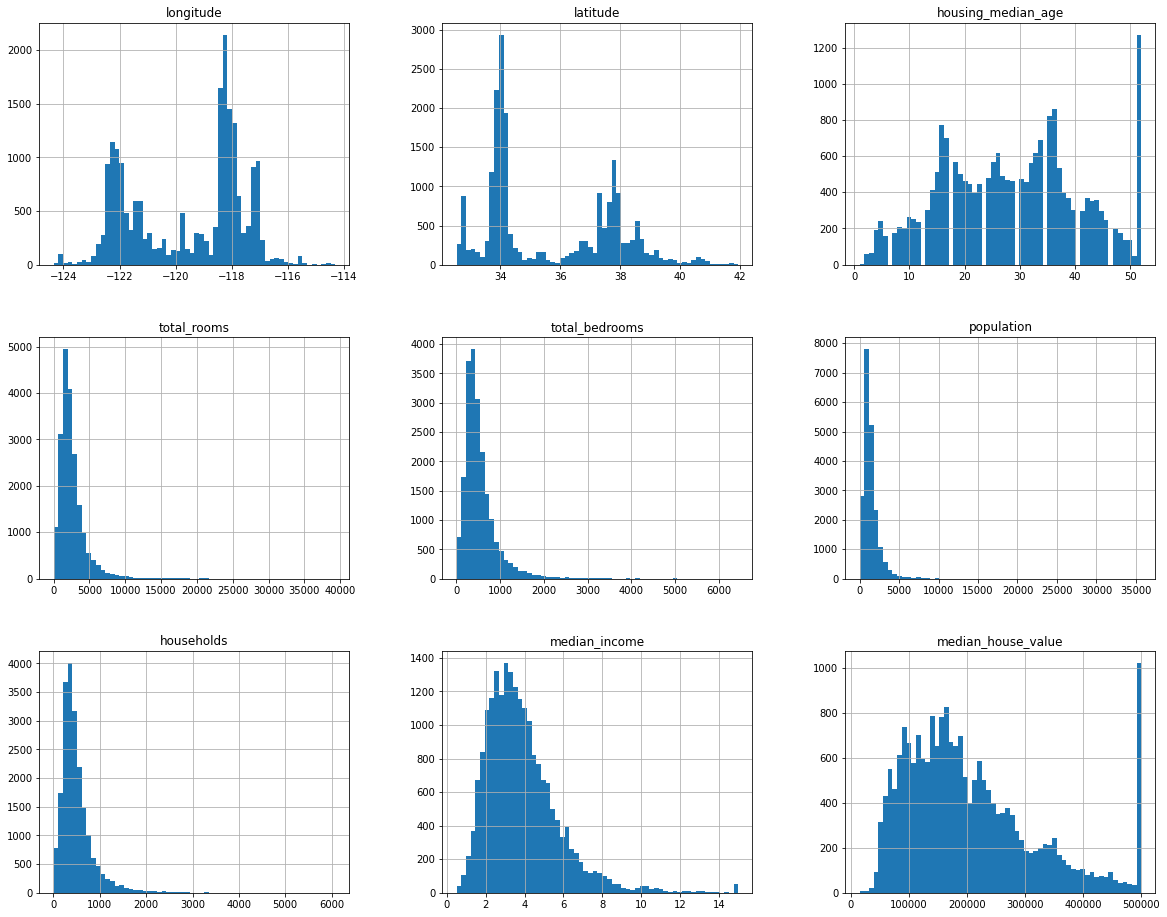

In [66]:
data.hist(bins=60, figsize=(20,16));plt.show();

Most of the data seems to have fairly normal distributions, but lets take a close look at `median_house_age` as it has an unusual spike near it maximum value that appears to correlate to the `median_house_value`.

Many of the features also appear to have significant outliers.

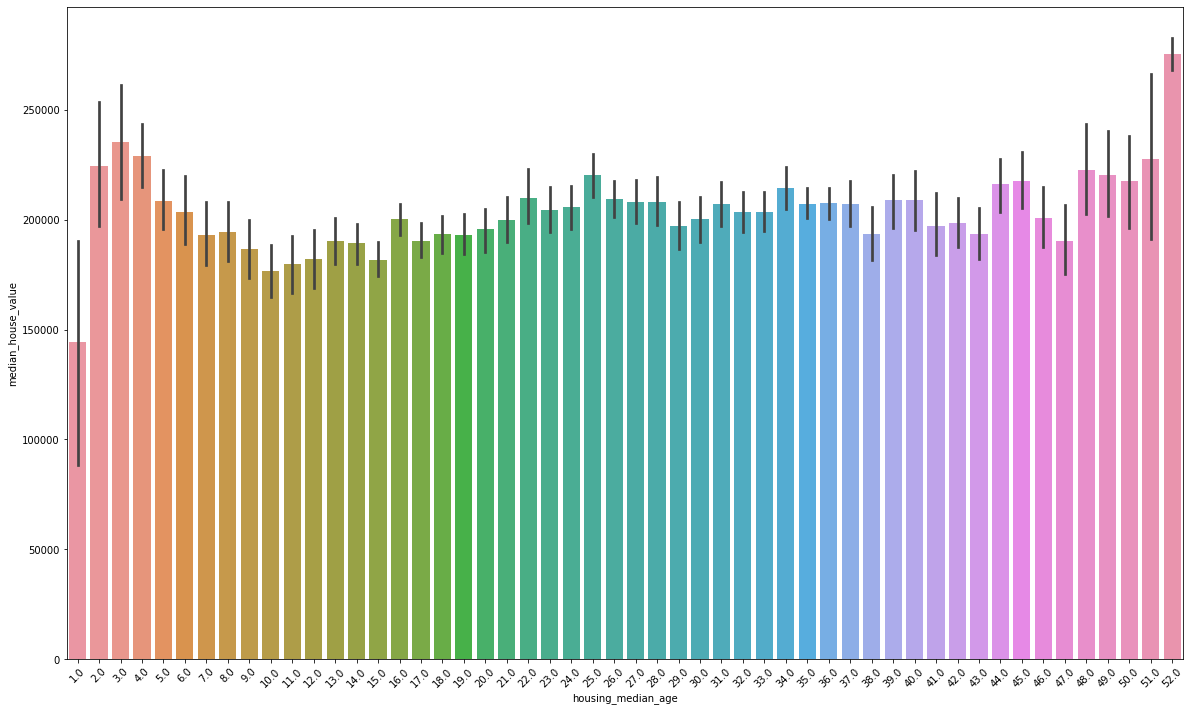

In [28]:
# Let's visualize housing_median_age vs median_house_value
fig = plt.figure(figsize = (20,12))
sns.barplot(x = 'housing_median_age', y = 'median_house_value', data = data);
plt.xticks(rotation = 45);

It appears newer homes and much older homes are valued the highest. 

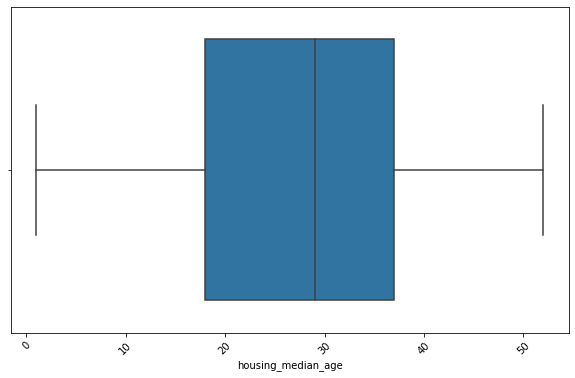

In [31]:
# let's visualize any outliers
fig = plt.figure(figsize = (10,6))
sns.boxplot(x = 'housing_median_age', data = data);
plt.xticks(rotation = 45);

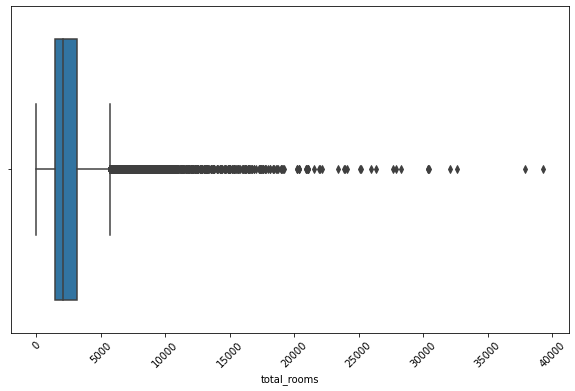

In [34]:
# let's visualize any outliers
fig = plt.figure(figsize = (10,6))
sns.boxplot(x = 'total_rooms', data = data);
plt.xticks(rotation = 45);

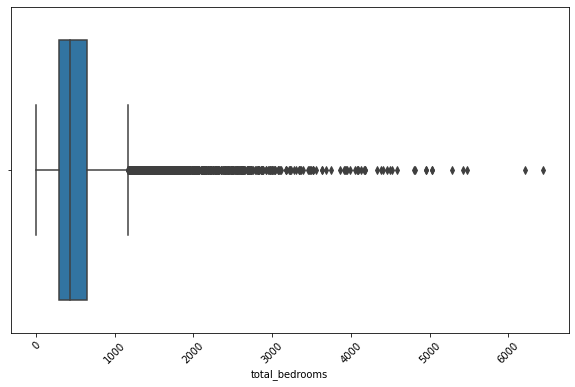

In [36]:
# let's visualize any outliers
fig = plt.figure(figsize = (10,6))
sns.boxplot(x = 'total_bedrooms', data = data);
plt.xticks(rotation = 45);

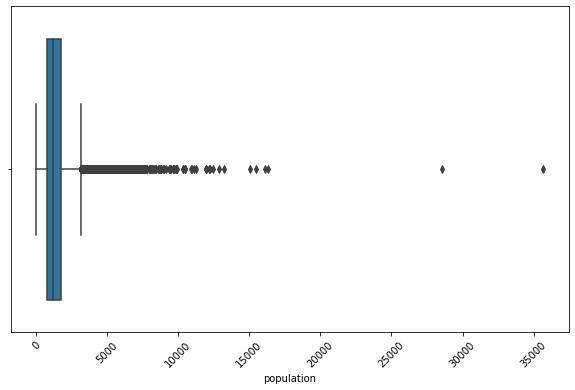

In [69]:
# let's visualize any outliers
fig = plt.figure(figsize = (10,6))
sns.boxplot(x = 'population', data = data);
plt.xticks(rotation = 45);

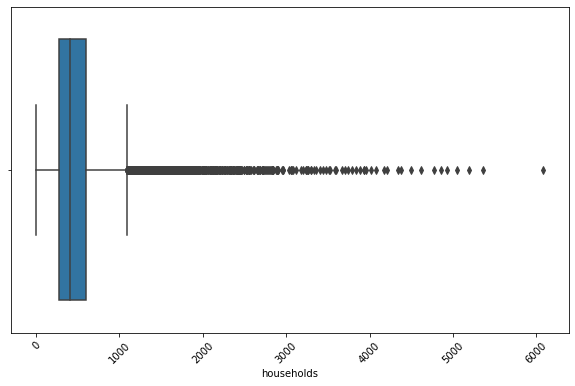

In [68]:
# let's visualize any outliers
fig = plt.figure(figsize = (10,6))
sns.boxplot(x = 'households', data = data);
plt.xticks(rotation = 45);

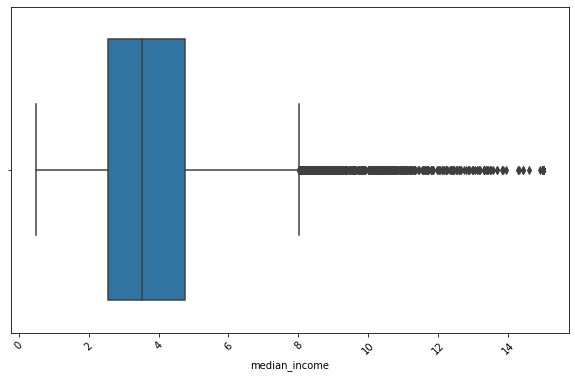

In [70]:
# let's visualize any outliers
fig = plt.figure(figsize = (10,6))
sns.boxplot(x = 'median_income', data = data);
plt.xticks(rotation = 45);

Let's also take a look at our object data type feature `ocean_proximity`

In [73]:
data.ocean_proximity.unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

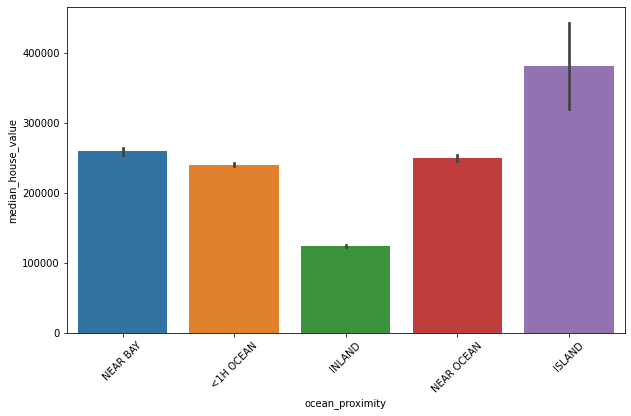

In [74]:
# let's visualize any outliers
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'ocean_proximity', y = data.median_house_value ,data = data);
plt.xticks(rotation = 45);

## Preprocess

Processed the data by cleaning it to make sure it was complete, correct, relevant, and free of errors and outliers.

Seems we have our work cut out for us. 
Let's create a list of tasks / problems we will need to solve. 

1. `total_bedrooms` has missing data that needs to be filled 
2. `housing_median_age`, `total_rooms`,	`total_bedrooms`, `population`,  and `households` have very high std, we will need to normalize our data
3. `ocean_proximity` is an object datatype which we will need to either *one_hot_encode* ,  *label_encode*   or manipulate in such a way that it can be utilized in our data 

# 4) Analyze
---

Experiment with different models and hyperparameters to meet criterias of success. 

Outlier Experiments

Model Experiments



Analyze data